# Introduction
This Notebook is created for personal learning purpose. I've been following some tutorials online and skilling myself up in ML and Data Science field. <br>
I created this Notebook while learning different phases of creating Machine Learning models. Also exploring SciKit-Learn ML library for python.

With this I'm using Sales Win and Loss data set from https://github.com/vkrit/data-science-class/blob/master/WA_Fn-UseC_-Sales-Win-Loss.csv, which is explored further in the notebook.

In [1]:
# import pandas module
import pandas as pd
# import seaborn module
import seaborn as sns
# import matplotlib module
import matplotlib.pyplot as plt

In [2]:
# read data from csv file
df = pd.read_csv('Sales-Win-Loss.csv')

# Data Exploration
After loading the data into pandas dataframe. Its time to explore it and investigate what information it contains.

In [3]:
# See first five rows in the dataframe
df.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1
3,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4


#### It can be seen that the dataframe has both numerical and string data.

In [4]:
# Check size of the dataframe
df.shape

(78025, 19)

#### Data frame has 78,025 rows and 19 columns.

In [5]:
df.tail()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
78020,10089932,Batteries & Accessories,Car Accessories,Southeast,Reseller,0,Loss,2,0,0,250000,1,1,3,Unknown,0.0,0.0,0.0,6
78021,10089961,Shelters & RV,Performance & Non-auto,Northeast,Reseller,0,Won,1,0,0,180000,1,1,0,Unknown,0.0,0.0,0.0,5
78022,10090145,Exterior Accessories,Car Accessories,Southeast,Reseller,0,Loss,2,0,0,90000,1,1,0,Unknown,0.0,0.0,0.0,4
78023,10090430,Exterior Accessories,Car Accessories,Southeast,Fields Sales,0,Loss,2,0,0,120000,1,1,0,Unknown,1.0,0.0,0.0,5
78024,10094255,Interior Accessories,Car Accessories,Mid-Atlantic,Reseller,0,Loss,1,0,0,90000,1,1,0,Unknown,0.0,0.0,0.0,4


### Data Types
We already know that the dataframe contains both numerican and string data. However it would be valuable to confirm each feature's data type.

In [6]:
# Show datatypes of each column in the dataframe.
df.dtypes

Opportunity Number                           int64
Supplies Subgroup                           object
Supplies Group                              object
Region                                      object
Route To Market                             object
Elapsed Days In Sales Stage                  int64
Opportunity Result                          object
Sales Stage Change Count                     int64
Total Days Identified Through Closing        int64
Total Days Identified Through Qualified      int64
Opportunity Amount USD                       int64
Client Size By Revenue                       int64
Client Size By Employee Count                int64
Revenue From Client Past Two Years           int64
Competitor Type                             object
Ratio Days Identified To Total Days        float64
Ratio Days Validated To Total Days         float64
Ratio Days Qualified To Total Days         float64
Deal Size Category                           int64
dtype: object

#### As we observed, features with string data has 'object' data type. And for numerical data we have two data types: int64 and float64.
When we will train a model using SciKit-learn, int64 and float64 datatypes are fine. However, it wouldn't work with the object (or string) datatypes.
Therefore, before we can train our model, we will need to first preprocess the data.

## Data Visualisation
Data visualisation is a great way of exploring data in more depths. It can give us an overall understanding of our data.
We will use <b>Seaborn</b> and <b>matplotlib</b> libraries to create some graphs and plots to visually represent our data.

In [7]:
# set background color of the plot
sns.set(style='whitegrid')

In [8]:
# set plot size
sns.set(rc={'figure.figsize':(8,6)})

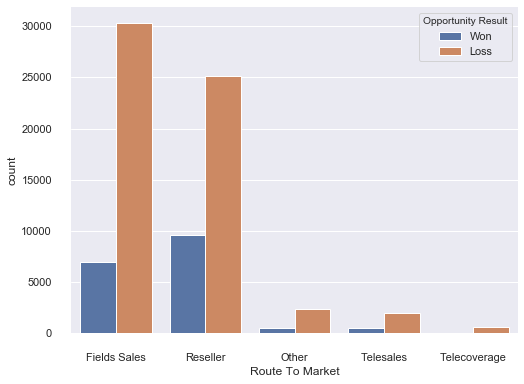

In [9]:
# create a countplot on 'Route To Market' feature
sns.countplot('Route To Market',data=df,hue = 'Opportunity Result')
# Remove the top and down margin
sns.despine(offset=10, trim=True)
# display the plot
plt.show()

We just draw a bar chart plot on <b>'Route to Market'</b> feature of the data set.
From this we can draw following conclusions: 
1. there are more records that are of type 'loss' than 'won'.
2. data is more concentrated towards 'Fields Sales' and 'Reseller'

### Pie Chart to show exact Data distribution between 'Won' and 'Loss' Records

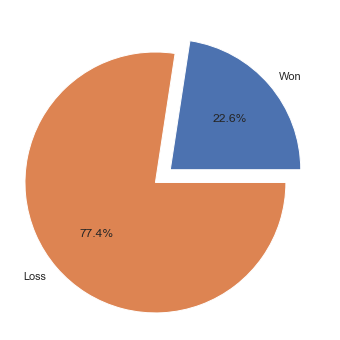

In [10]:
# Create a pie chart to show 'Won' 'Loss' data distribution, to confirm above ovbservation
plt.pie(
    # using data total)arrests
    [df.loc[df['Opportunity Result'] == 'Won'].shape[0], df.loc[df['Opportunity Result'] == 'Loss'].shape[0]],
    # with the labels being officer names
    labels=df['Opportunity Result'].unique(),
    # with no shadows
    shadow=False,
    # with one slide exploded out
    explode=(0, 0.15),
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot
plt.show()

### Violin plot to see data distribution based on features
Next lets plot a violin plot on the 'Opportunity Result' column against 'Client size by Revenue' feature. This should show us data distribution, and data concentration between specific features and labels.

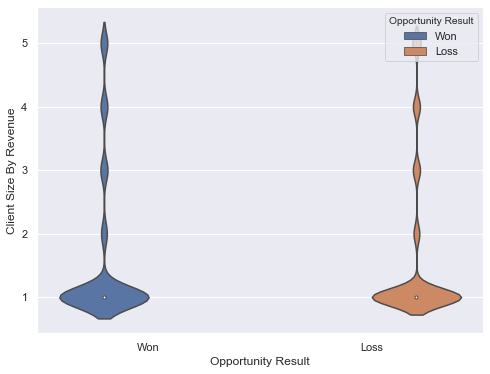

In [11]:
# plotting the violinplot on 'Client Size By Revenue' feature and 'Opportunity Result'
sns.violinplot(x="Opportunity Result",y="Client Size By Revenue", hue="Opportunity Result", data=df);
plt.show()

Its quite clear from this plot, that most of the data is distributed in Client Size By Revenue of '1'.

In [12]:
# Get shape of the dataframe for different values of 'Client Size By Revenue'.
print('Client Size By Revenue == 1 :', (df.loc[df['Client Size By Revenue'] == 1].shape))
print('Client Size By Revenue == 2 :', (df.loc[df['Client Size By Revenue'] == 2].shape))
print('Client Size By Revenue == 3 :', (df.loc[df['Client Size By Revenue'] == 3].shape))
print('Client Size By Revenue == 4 :', (df.loc[df['Client Size By Revenue'] == 4].shape))
print('Client Size By Revenue == 5 :', (df.loc[df['Client Size By Revenue'] == 5].shape))

Client Size By Revenue == 1 : (59504, 19)
Client Size By Revenue == 2 : (3841, 19)
Client Size By Revenue == 3 : (4756, 19)
Client Size By Revenue == 4 : (4636, 19)
Client Size By Revenue == 5 : (5288, 19)


What our violin plot showed us above, is also now shown in numbers. 
1. Out of '78025' total records, '59504' records belong to Client Size By Revenue of 1. Larget data distribution.
2. Data distribution for other values of Client Size By Revenue is relatively very small.

# Data Pre-Processing

I belive we now have a good understanding of our data. <br>
Next step is to get our data ready for sci-kit learn library's algorithams. <br> 
We noticed earlier in our data exploration that some of the features in our data set are of type string. And we know sci-kit learn algorithams only understand numerical data.

Hence we are going to have to convert the string data into numerical data. <br>
We can choose to remove the string features that are not very important. However today we aren't going to do it.

We'll use <b>LabelEncoder</b> from Sci-Kit Learn to encode our string data into numerical

We already know that following columns in our dataframe contain string values:
1. Supplies Subgroup 
2. Region 
3. Route To Market
4. Opportunity Result 
5. Competitor Type
6. Supplies Group’

In [13]:
# Lets have a quick look into what data we have in these columns
print("=========================================================================")
print("Supplies Subgroup' : ",df['Supplies Subgroup'].unique())
print("=========================================================================")
print("Region : ",df['Region'].unique())
print("=========================================================================")
print("Route To Market : ",df['Route To Market'].unique())
print("=========================================================================")
print("Opportunity Result : ",df['Opportunity Result'].unique())
print("=========================================================================")
print("Competitor Type : ",df['Competitor Type'].unique())
print("=========================================================================")
print("'Supplies Group : ",df['Supplies Group'].unique())
print("=========================================================================")

Supplies Subgroup' :  ['Exterior Accessories' 'Motorcycle Parts' 'Shelters & RV'
 'Garage & Car Care' 'Batteries & Accessories' 'Performance Parts'
 'Towing & Hitches' 'Replacement Parts' 'Tires & Wheels'
 'Interior Accessories' 'Car Electronics']
Region :  ['Northwest' 'Pacific' 'Midwest' 'Southwest' 'Mid-Atlantic' 'Northeast'
 'Southeast']
Route To Market :  ['Fields Sales' 'Reseller' 'Other' 'Telesales' 'Telecoverage']
Opportunity Result :  ['Won' 'Loss']
Competitor Type :  ['Unknown' 'Known' 'None']
'Supplies Group :  ['Car Accessories' 'Performance & Non-auto' 'Tires & Wheels'
 'Car Electronics']


#### Let's encode

In [14]:
#import LabelEncoder
from sklearn.preprocessing import LabelEncoder
# create the Labelencoder object
le = LabelEncoder()
#encode the string columns into numeric
df['Supplies Subgroup'] = le.fit_transform(df['Supplies Subgroup'])
df['Region'] = le.fit_transform(df['Region'])
df['Route To Market'] = le.fit_transform(df['Route To Market'])
df['Opportunity Result'] = le.fit_transform(df['Opportunity Result'])
df['Competitor Type'] = le.fit_transform(df['Competitor Type'])
df['Supplies Group'] = le.fit_transform(df['Supplies Group'])

Let's see how our encoding went.

In [15]:
#display the head of our dataframe
df.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,2,0,3,0,76,1,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,1658010,2,0,4,2,63,0,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1
2,1674737,5,2,4,2,24,1,7,82,82,7750,1,1,0,2,1.00000,0.000000,0.000000,1
3,1675224,8,2,1,2,16,0,5,124,124,0,1,1,0,0,1.00000,0.000000,0.000000,1
4,1689785,2,0,4,2,69,0,11,91,13,69756,1,1,0,2,0.00000,0.141125,0.000000,4


### Great!!
Now all our features are numercial. This means, we are now ready to train our machine learning models with sci-kit learn

# Building Machine Learning Models

Before we can get into training mode. We need to sperate our features and the target label in our dataset

In [16]:
# Get a new dataframe without the 'Opportunity Result' column
X = df.drop('Opportunity Result', axis=1)
# Get only the 'Opprotunity Result' column
y = df['Opportunity Result']

In [17]:
X.head(2)

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,2,0,3,0,76,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,1658010,2,0,4,2,63,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1


In [18]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Opportunity Result, dtype: int64

### Creating Training and Test Data Sets
I'll use <b>train_test_split</b> from sklearn library to do this.

In [19]:
# import train_test_split
from sklearn.model_selection import train_test_split 

In [20]:
# split test and train data. With Test Data of size 20% of the total dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [21]:
X_train.shape

(62420, 18)

In [22]:
X_test.shape

(15605, 18)

In [23]:
y_train.shape[0]

62420

In [24]:
y_test.shape[0]

15605

## Lets build our ML Models

### We will use three algorithams in the sklearn libraries to train our models.
#### 1. Naive Bayes
#### 2. Support Vactor Machines
#### 3. K-Neighbours Classifier

## 1. Naive Bayes

Naive Bayes classification algoritham is based on Naive Bayes Theorem. Which assumes all features in the data are independent of each other. Which is a big assumption for a real world data.

We will use <b> Gaussian Naive Bayes </b> algoritham from sklearn for this model.

In [25]:
# import GaussianNB and accuracy_score from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#create an object of the type GaussianNB
gnb = GaussianNB()
#train the model with training data
gnb.fit(X_train, y_train)
# make predictions with testing data (not seen by the model yet.)
pred = gnb.predict(X_test)

Now we have trained our GNB model with training data. <br>
And we have also made predictions on the test data.

In [26]:
# import numpy
import numpy

# Get total count of 'Won' (1), and 'Loss' (0) in the predictions
unique, counts = numpy.unique(pred, return_counts=True)
dict(zip(unique, counts))

{0: 15549, 1: 56}

Now is the time to check how accurate our new GNB model is in making predictions.

In [27]:
#print the accuracy score of the model
print("Naive Bayes accuracy : ",accuracy_score(y_test, pred, normalize = True))

Naive Bayes accuracy :  0.7776353732777955


Finally, We have completed the training and testing of our GNB model. And also now know how accurate this model is in making prediction. <br>
Accuracy of this model isn't very high. Just about <b>77.8%</b>

## 2. Support Vactor Machines

We'll use the Linear <b>Support Vactor Classification (LinearSVC)</b> algorithom from sklearn.

In [28]:
#import the LinearSVC and acuracy_score
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

#create an object of type LinearSVC
svc = LinearSVC(random_state=0)
#train the model with training data
pred = svc.fit(X_train, y_train)
# make predictions with testing data (not seen by the model yet.)
pred = gnb.predict(X_test)

/Users/thelennisters/Projects/MachineLearning/SciKit-Learn/SalesWinLoss/venv/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Now we have trained our SVC model with training data. <br>
And we have also made predictions on the test data.

In [29]:
#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(y_test, pred, normalize = True))

LinearSVC accuracy :  0.7776353732777955


We have now completed the training and testing of our LinearSVC model. And also now know how accurate this model is in making prediction. <br>
Accuracy of this model isn't very high, same as our GNB model. Just about <b>77.8%</b> <br>

One this to note with LinearSVC model is, although it's accuracy is same as GNB model. It took alot longer to make predictions compared to GNB.

## 3. K-Neighbors Classifier

In [30]:
#import KNeighborsClassifier and accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#create object of the Kneighbors Classifier
knc = KNeighborsClassifier(n_neighbors=5)
#train the model with training data
knc.fit(X_train, y_train)
# make predictions with testing data (not seen by the model yet.)
pred = knc.predict(X_test)

In [31]:
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(y_test, pred, normalize = True))

KNeighbors accuracy score :  0.7574495354053188


After training and testing our KNC model. It's accuracy turns out to be <b>75.7%</b>. <br>
Which is lower than our previous to ML Models.